# Python Basics
This is a basic python activity supporting your assessments 2 in FIT5145 TP1 2017.
Python is a general purpose programming language
- interpreted (aka scripting) language -- like Javascript & R
- designed by computer scientists (not statisticians)
- open-source
- very popular

Of course there are lots of alternatives:
- R, Matlab, SAS, … 

## 1. Basic Python syntax

Compute mathematical expressions:

In [3]:
3+5

8

Define variables and assign values:
Formula syntax comes from C, 
so some expressions are 
interpreted differently from R: 
• e.g. to compute 2 cubed 
type 2**3 not 2^3

In [4]:
A = 10
5*A + 6

56

Define a vector:

In [5]:
B = [5,5,3,0] #Can use square or round  brackets: B = (5,5,3,0)
B

[5, 5, 3, 0]

Access part of vector:

In [6]:
# BEWARE: First index of array is 0 not 1!
B[0]

5

In [7]:
B[1:3]

[5, 3]

## Loading libraries
Load a library with “from … import … as …” keywords, e.g.:


In [2]:
from matplotlib import pyplot as plt 
# Can also use shorter “.” notaion rather than “from” to load library: import matplotlib.pyplot as plt
# plt is the name we are giving to the imported library. 
# We use it whenever we want to call a function provided by the library, e.g., plt.boxplot(…) 

## 2. Data tables in python
The pandas library provides a table structure called DataFrame

### 2.1 Creating dataframe

In [3]:
# importing the library and name it as pd
import pandas as pd

# create the dataframe
df = pd.DataFrame({
 'StudentID' : [264422,264423,264444,264445,264446], # StudentID column and its data
 'Name' : ['Steven','Alex', 'Bill', 'Mark','Bob'], # Name column and its data
  'EnrolYear' : [2010,2010, 2011, 2011,2013], # Enrolment year column and its data
  'Math' : [100,90,90,40,60], # Mathematics score column and its data
  'English' : [60,70,80,80,60] # English score column and its data
})

# print out the dataframe
df

,English,EnrolYear,Math,Name,StudentID
0,60,2010,100,Steven,264422
1,70,2010,90,Alex,264423
2,80,2011,90,Bill,264444
3,80,2011,40,Mark,264445
4,60,2013,60,Bob,264446


### 2.2 Basic element selection

In [4]:
# Select a column by using its column name:
df['Name']

0    Steven
1      Alex
2      Bill
3      Mark
4       Bob
Name: Name, dtype: object

In [5]:
# Select row when it meet conditions 
df[df['Name'] == 'Alex'] # select record of Alex

,English,EnrolYear,Math,Name,StudentID
1,70,2010,90,Alex,264423


In [6]:
# Selection with complex conditions
filt = (df.Name != 'Bob') & (df.StudentID > 264423) # select rows where name is not 'Bob' and student ID is larger than 2644423
df[filt]

,English,EnrolYear,Math,Name,StudentID
2,80,2011,90,Bill,264444
3,80,2011,40,Mark,264445


In [7]:
# operation on columns
# create a total score column
df['Total'] = df['Math'] + df['English']
df

,English,EnrolYear,Math,Name,StudentID,Total
0,60,2010,100,Steven,264422,160
1,70,2010,90,Alex,264423,160
2,80,2011,90,Bill,264444,170
3,80,2011,40,Mark,264445,120
4,60,2013,60,Bob,264446,120


### 2.3 Melting table
Have a look at the each subject in different rows, so we melt the table

In [8]:
#column name 'Math' and 'English' are now values of column 'variable'
df = pd.melt(df, id_vars=['EnrolYear','Name','StudentID'],value_vars=['Math','English'],var_name='Subject')

# you can also rename a column seperately:
df.rename(columns = {'value':'Score'}, inplace = True)
df

,EnrolYear,Name,StudentID,Subject,Score
0,2010,Steven,264422,Math,100
1,2010,Alex,264423,Math,90
2,2011,Bill,264444,Math,90
3,2011,Mark,264445,Math,40
4,2013,Bob,264446,Math,60
5,2010,Steven,264422,English,60
6,2010,Alex,264423,English,70
7,2011,Bill,264444,English,80
8,2011,Mark,264445,English,80
9,2013,Bob,264446,English,60


### 2.4 Merging data table
Now assume if you got another data table storing the height of the student and suppose now for some reason you want to merge two data sets:

In [9]:
# notice in df2, 'Bob' (ID: 264446) is missing
df2 = pd.DataFrame({
 'StudentID' : [264422,264423,264444,264445], # StudentID column and its data
  'Height' : [160,155,175,175], # Height column and its data
})

df2

,Height,StudentID
0,160,264422
1,155,264423
2,175,264444
3,175,264445


In [10]:
merge = pd.merge(df,df2, on=['StudentID'])
merge # have a look

,EnrolYear,Name,StudentID,Subject,Score,Height
0,2010,Steven,264422,Math,100,160
1,2010,Steven,264422,English,60,160
2,2010,Alex,264423,Math,90,155
3,2010,Alex,264423,English,70,155
4,2011,Bill,264444,Math,90,175
5,2011,Bill,264444,English,80,175
6,2011,Mark,264445,Math,40,175
7,2011,Mark,264445,English,80,175


### 2.5 Read csv and excel file into dataframe

In [11]:
ufo_reports = pd.read_csv('uforeports.csv')
ufo_reports.head() # print the first 5 records out to have a look

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-01-06 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-01-06 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [12]:
# very similar if we have a xls file instead
ufo_reports_xls = pd.read_excel('uforeports_excel.xls', sheetname = 'uforeports') # we will have to specify the sheet name
ufo_reports_xls.head() # print the first 5 records out to have a look

# notice that here we just have the same data in two different file format, and so python recognise the Time variable differently

C:\Users\User\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-01-06 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-01-06 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


Notice that Time columns in two dataframe are in indeed, in different formats, check it out!

In [13]:
print (ufo_reports.Time.dtypes) # just an object
print (ufo_reports_xls.Time.dtypes) # datetime format, this comes along with xls, you can format columns

object
datetime64[ns]


So in the dataframe reading from csv files, the Time column is just an object, we can change that to datatime format so they are consistent. 

In [ ]:
ufo_reports.Time = pd.to_datetime(ufo_reports.Time) # change to datetime format
print (ufo_reports.Time.dtypes) # print its datatype now 
ufo_reports.head() # print the head to check whether it looks the same as the other dataframe

## 3. Basic data auditing

We could easily do some auditing or exploration of the data using python. 
Graphical data exploration for outlier identification could be found in Section 5.
Here let's use the titanic data set.

In [14]:
titanic = pd.read_csv('titanic.csv') # read in titanic data into pandas dataframe
print (titanic.shape) # have a look at the dimension of the dataframe
titanic.head() # printing out the first few rows

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# have a look at the data types of each columns
titanic.dtypes

We can do summary statistics to see the count, number of unique values, as well as the value range of numeric fields.

In [16]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# looking at unique values of a column
titanic.age.value_counts().head()

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: age, dtype: int64

## 4. Group by
Continue to use the titanic data set, let's focus on the age of passengers. 
We show how to look at the mean of column using describe() function (alternatively, you can get the mean by titanic['age'].mean()).
Here we will go for a more detailed look at the age for different groups.

In [19]:
# this groupby has created a series with a hierachical index. We can then apply methods to the individual groups
sex_class = titanic.groupby(['sex','class'])['age']

# have a look
sex_class.median()

sex     class 
female  First     35.0
        Second    28.0
        Third     21.5
male    First     40.0
        Second    30.0
        Third     25.0
Name: age, dtype: float64

In a more sophisticated case, if you want to do statistics on multiple columns or if you want to apply different aggregate function to different columns, this is one way to go....

In [20]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
fun = {'who':{'passengers':'count'},'age':{'average age':'mean'}}
groupbyClass = titanic.groupby('class').agg(fun)



C:\Users\User\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [ ]:
fun = {'who':{'passengers':'count'},'age':{'average age':'mean'}} # specify aggregation functions to columns 'who' and 'age'
# by doing this, we've also give the statistics a name, 
# e.g., the number of records in 'who' is named as 'passengers', and,
# the mean values of 'age' is called 'average age'

groupbyClass = titanic.groupby('class').agg(fun) # groupby and apply functions
# you can have a look now
# groupbyClass

# we try to make it look pretty, i.e., make it as a dataframe, you can have a look at it by yourself step by step
groupbyClass = groupbyClass.reset_index() # reset its index
groupbyClass.columns = groupbyClass.columns.droplevel(0) # drop level 0 index
groupbyClass.rename(columns = {'':'class'},inplace = True) # rename the first column
# now have a look, so this tells statistic about the average age and the number of passengers in each class
groupbyClass 


## 5. Apply function
Apply function is a built-in function in python, it is a very handy tool when we want to apply a function to each element of a list, series, or rows/columns of dataframes etc.

It is also very handy when we combine the use of lambda function (also called anonymous function: is a function that is defined without a name).

In [ ]:
# here, we want to see: the age diversity in each class; and the number of people elder than 50 in each class
# so in the following, the two lamda functions apply to the age column, 
# the 'unique age values' counts it unique not null values, 
# and the 'elder age group' counts the number of values larger than 50
# notice that here we apply two functions to the same column 'age'.
fun = {'age':{'unique age values':lambda x: x.nunique(),'elder age group':lambda x: x[x>50].count()}} 

# just making it pretty
groupbyClass = titanic.groupby('class').agg(fun).reset_index()  # reset its index
groupbyClass.columns = groupbyClass.columns.droplevel(0) # drop level 0 index
groupbyClass.rename(columns = {'':'class'},inplace = True) # rename the first column
groupbyClass # now have a look

## 6. Basic plotting

### Simply plot 
You can just simiply plot the value to have a look. But sometimes this wouldn't tell anything, e.g.

In [ ]:
import matplotlib.pyplot as plt #import library for plotting
# This following magic line is to make sure graph shown inline of the notebook
%matplotlib inline
# continue to use titanic data set
plt.plot(titanic.fare) # this simply plots the fare of each passenger, so there are about 900 passengers.
plt.show()

### Histogram
Instead, we could have a look at the distribution by histogram. 

In [ ]:
titanic.fare.hist(bins = 200) # you can try different bin number to have a look
plt.xlim(0, 300) # setting limit on x-axis
plt.ylim(0,600) # setting limit on y-axis

### Boxplot
Or alternatively, we can use boxplot, this helps you to identify any outliers

A boxplot (also called a box and whisker diagram) is a simple visual representation of key features of a univariate sample. 
It displays five-point summaries and potential outliers in graphical form. 

The following figure shows an illustration graph of boxplot elements.
<img src="Boxplot.png",width=500,height=500>

In [ ]:
titanic.boxplot(column = 'fare')
plt.ylim(0, 600) # setting limit on y-axis
# we can see that there are lots of outliers in column 'fare'

We can see that there are lots of outliers in column 'fare', but it probably make much more sense to look at it by different classes:

In [ ]:
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 600) # setting limit on y-axis
# we can see that there are lots of outliers in column 'fare'

Now, we can remove the outliers in different classes. Notice that you could have make the following code more efficient and accurate. But we are trying to keep the simplicity here.

In [ ]:
# deleting outliers for First class
filt = ~((titanic['class'] == 'First') & (titanic['fare'] > 160))
titanic = titanic[filt]

# deleting outliers for Second class
filt = ~((titanic['class'] == 'Second') & (titanic['fare'] > 50))
titanic = titanic[filt]

# deleting outliers for Third class
filt = ~((titanic['class'] == 'Third') & (titanic['fare'] > 30))
titanic = titanic[filt]

# Now have a look at it, should be much better!
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 600) # setting limit on y-axis
# we can see that there are lots of outliers in column 'fare'

### Barchart
We can compare fare for different classes and for kids/adult by bar chart

In [ ]:
# prepare the statistics of children fare (under 18) and adult fare in different classes
fun = {'fare':{'child fare':lambda x: x[x<=18].mean(),'adult fare':lambda x: x[x>18].mean()}}
groupbyClass = titanic.groupby('class').agg(fun) # groupby and apply functions

groupbyClass = groupbyClass.reset_index() # reset its index
groupbyClass.columns = groupbyClass.columns.droplevel(0) # drop level 0 index
groupbyClass.rename(columns = {'':'class'},inplace = True) # rename the first column
# now have a look, so this tells statistic about the average age and the number of passengers in each class
groupbyClass 

In [ ]:
import numpy as np
ind = np.arange(0, 3*2, 2)
width = 0.5      # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, groupbyClass['child fare'], width, color='g')
rects2 = ax.bar(ind + width, groupbyClass['adult fare'], width, color='c')

# add some text for labels, title and axes ticks
ax.set_ylabel('fare')
ax.set_title('Child and Adult fare for different classes')
ax.set_xticks(ind + width+0.1)
ax.set_xticklabels(groupbyClass['class'],rotation='vertical')

ax.legend((rects1[0], rects2[0]), ('child fare', 'adult fare'))

fig.set_size_inches(18.5, 10.5)

## 7. Basic regression

Input a simple data frame.

In [19]:
df = pd.DataFrame({'Name' : ['Mike Hussey','Aaron Finch', 'Brad Hogg' , 'Steve Smith' , 'George Bailey', 'Mitchell Johnson', 'Shaun Marsh',  'Glenn Maxwell','Pat Cummins' , 'Mitchell Starc', 'David Warner'],
'Age' : [39,28,44,25,32,33,31,26,22,25,28],
'IPLSal' :[310,662,103,828,672,1340,455,1240,207,1030,1140]})

df

,Age,IPLSal,Name
0,39,310,Mike Hussey
1,28,662,Aaron Finch
2,44,103,Brad Hogg
3,25,828,Steve Smith
4,32,672,George Bailey
5,33,1340,Mitchell Johnson
6,31,455,Shaun Marsh
7,26,1240,Glenn Maxwell
8,22,207,Pat Cummins
9,25,1030,Mitchell Starc


Have a quick look at the data.

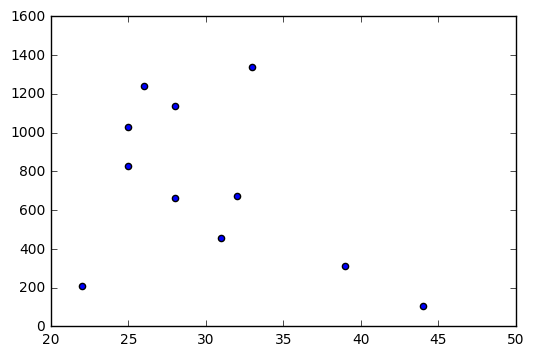

In [20]:
plt.scatter(df['Age'], df['IPLSal'])
# and plot to see data
plt.show()

We now have 3 views of the same dataset, the raw data embedded in the code (or in a file), the dataframe (fairly similar), and the plot. What information do you gain/lose in these different views? 

We can see a general trend, from left to right, which you could probably draw a line through to show an estimate (linear regression).

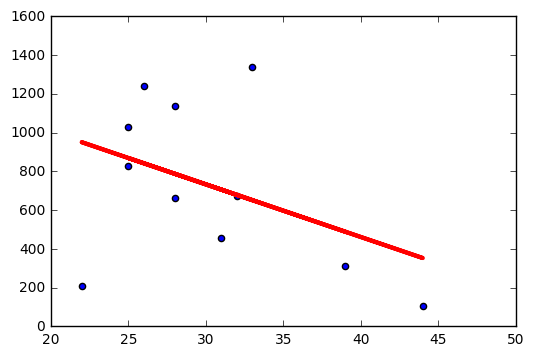

In [21]:
from scipy.stats import linregress
# We use a standard package: 
slope, intercept, r_value, p_value, std_err = linregress(df['Age'],df['IPLSal'])
# Here's our function:
line = [slope*xi + intercept for xi in df['Age']]
# plot up the line
plt.plot(df['Age'],line,'r-', linewidth=3)
#  plot up the data points
plt.scatter(df['Age'], df['IPLSal'])
plt.show()

In the above code what is ‘slope’?    And what is ‘intercept’?  What do they represent on the curve?

In [24]:
slope

-27.178343949044589

In [25]:
intercept

1548.8535031847136